data visualization

statistical graphing

In [1]:
#Task 1.0  import libraries 
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
##import inforamtion from cleaned data from previous 
#Task 1.1  import csv file

UsedVehicle=pd.read_csv(r'.\Data\UsedCarData\clean_vehicles.csv', header=0 )

In [3]:
UsedVehicle.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,description,state,lat,long,posting_date,posting_date2
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,unknown,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:18-0500,2021-05-04
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,unknown,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:08-0500,2021-05-04
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:25-0500,2021-05-04
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T10:41:31-0500,2021-05-04
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,2021-05-03
5,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,4wd,unknown,pickup,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,2021-05-03
6,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,...,4wd,unknown,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T12:41:33-0500,2021-05-03
7,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,4wd,unknown,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,2021-05-03
8,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,4wd,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,2021-05-03
9,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,...,rwd,unknown,other,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T07:50:35-0500,2021-05-03


In [4]:
#Task 1.2

UsedVehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416149 entries, 0 to 416148
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         416149 non-null  object 
 1   price          416149 non-null  int64  
 2   year           416149 non-null  float64
 3   manufacturer   416149 non-null  object 
 4   model          416149 non-null  object 
 5   condition      416149 non-null  object 
 6   cylinders      416149 non-null  object 
 7   fuel           416149 non-null  object 
 8   odometer       416149 non-null  float64
 9   title_status   416149 non-null  object 
 10  transmission   416149 non-null  object 
 11  VIN            416149 non-null  object 
 12  drive          416149 non-null  object 
 13  size           416149 non-null  object 
 14  type           416149 non-null  object 
 15  paint_color    416149 non-null  object 
 16  description    416149 non-null  object 
 17  state          416149 non-nul

The 3 column that I think are useless are 
    id
    url
    region_url
    image_url
    
    
    

In [5]:
#Task 1.3
UsedVehicle.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,description,state,lat,long,posting_date,posting_date2
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,unknown,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:18-0500,2021-05-04
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,unknown,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:08-0500,2021-05-04
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:25-0500,2021-05-04
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T10:41:31-0500,2021-05-04
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,2021-05-03
5,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,...,4wd,unknown,pickup,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,2021-05-03
6,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,...,4wd,unknown,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T12:41:33-0500,2021-05-03
7,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,...,4wd,unknown,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,2021-05-03
8,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,...,4wd,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,2021-05-03
9,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,...,rwd,unknown,other,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T07:50:35-0500,2021-05-03


In [6]:
#Task 1.4
UsedVehicle.describe()

,price,year,odometer,lat,long
count,4.161490e+05,416149.000000,4.161490e+05,416149.000000,416149.000000
mean,6.158955e+04,2011.365749,9.766435e+04,38.504563,-94.620544
std,1.108080e+07,9.140825,2.046903e+05,5.792041,18.202327
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.995000e+03,2008.000000,3.800000e+04,34.760000,-111.706944
50%,1.399100e+04,2014.000000,8.568200e+04,39.081944,-88.811252
75%,2.650000e+04,2017.000000,1.335030e+05,42.350000,-81.027303
max,3.736929e+09,2022.000000,1.000000e+07,82.252826,173.885502


In [7]:
#Task 2.0
#take a look what is 25%, 50% and 75% of credit of loan
# median loan 5995, 13991, 26500
np.percentile(UsedVehicle['price'],[25,50,75])

array([ 5995., 13991., 26500.])

In [8]:
#Task 3.1.0
UsedVehicle['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [9]:
#Task 3.1.1

a=len(UsedVehicle['region'].unique())
print(a)

404


In [10]:
#Task 3.2.0

UsedVehicle['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'unknown', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'ferrari', 'mini',
       'pontiac', 'fiat', 'rover', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover'],
      dtype=object)

In [11]:
#Task 3.2.1


a=len(UsedVehicle['manufacturer'].unique())
print(a)

42


In [12]:
#Task 3.3.0
#there is 113 years of cars.  it might be intersting to find which vehicle 
#at which year sells the most car
UsedVehicle['year'].unique()

array([2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019., 2011.,
       1992., 2018., 2004., 2015., 2001., 2006., 2003., 2008., 2007.,
       2005., 1966., 2009., 1998., 2002., 1999., 2021., 1997., 1976.,
       1969., 1995., 1978., 1954., 1979., 1970., 1974., 1996., 1987.,
       2000., 1955., 1991., 1972., 1988., 1994., 1968., 1984., 1986.,
       1989., 1973., 1946., 1933., 1958., 1985., 1957., 1953., 1942.,
       1963., 1977., 1993., 1990., 1982., 1948., 1983., 1936., 1932.,
       1951., 1980., 1967., 1971., 1981., 1947., 1926., 1962., 1975.,
       1964., 1952., 1940., 1959., 1930., 1950., 1965., 1922., 1928.,
       2022., 1901., 1960., 1941., 1929., 1956., 1924., 1927., 1939.,
       1923., 1949., 1937., 1934., 1931., 1961., 1935., 1918., 1900.,
       1938., 1913., 1916., 1943., 1925., 1921., 1915., 1945., 1902.,
       1905., 1920., 1944., 1910., 1909.])

In [13]:
#Task 3.3.1
a=len(UsedVehicle['year'].unique())
print(a)

113


In [14]:
#Task 3.4.0
#Looking at the different model it might be hard to find something interesting out of it
UsedVehicle['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'gand wagoneer', '96 Suburban',
       'Paige Glenbrook Touring'], dtype=object)

In [15]:
#Task 3.4.1
a=len(UsedVehicle['model'].unique())
print(a)

29236


In [16]:
#Task 3.5.0
#Find which type of cars are the sold
#
UsedVehicle['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'unknown', 'new',
       'salvage'], dtype=object)

In [17]:
#Task 3.5.1
a=len(UsedVehicle['condition'].unique())
print(a)

7


In [18]:
#Task 3.6.0
#type of cars are being the class
UsedVehicle['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'unknown', 'electric'],
      dtype=object)

In [19]:
#Task 3.6.1
a=len(UsedVehicle['fuel'].unique())
print(a)

6


In [20]:
#Task 3.7.0
#type of car sold
UsedVehicle['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'unknown', 'salvage', 'missing',
       'parts only'], dtype=object)

In [21]:
#Task 3.7.1
a=len(UsedVehicle['title_status'].unique())
print(a)

7


In [22]:
#Task 3.8.0
UsedVehicle['transmission'].unique()

array(['other', 'automatic', 'manual', 'unknown'], dtype=object)

In [23]:
#Task 3.8.1
a=len(UsedVehicle['transmission'].unique())
print(a)

4


In [24]:
#Task 3.9.0
UsedVehicle['drive'].unique()

array(['unknown', 'rwd', '4wd', 'fwd'], dtype=object)

In [25]:
#Task 3.9.1
a=len(UsedVehicle['drive'].unique())
print(a)

4


In [26]:
#Task 3.10
UsedVehicle['size'].unique()

array(['unknown', 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [27]:
#Task 3.10
a=len(UsedVehicle['size'].unique())
print(a)

5


In [28]:
#Task 5.2
#_=CCLoan.groupby('LATE_PAYMENT')['NAME_EDUCATION_TYPE'].hist(bins =5)
#_=plt.xlabel('NAME_EDUCATION_TYPE')
#_=plt.ylabel('LATE_PAYMENT')
#_=plt.title("Late Payment vs NAME_EDUCATION_TYPE")

#plt.show()





#Task 5.4.1
#CCLoan_new=CCLoan.groupby('LATE_PAYMENT')['NAME_FAMILY_STATUS'].value_counts().unstack(0)
#CCLoan_new/CCLoan_new.sum()



#Task 5.8
UsedVehicle_new=UsedVehicle.groupby('size')['price'].mean()

print(UsedVehicle_new)




size
compact         16883.896711
full-size       99610.141978
mid-size       121264.816361
sub-compact     12383.630933
unknown         50107.260701
Name: price, dtype: float64


In [29]:
UsedVehicle_new01=UsedVehicle.groupby(['size','year'])['price'].mean()

In [30]:
print(UsedVehicle_new01)

size     year  
compact  1913.0    27000.000000
         1916.0    30000.000000
         1923.0    18335.833333
         1926.0     6500.000000
         1927.0    19999.166667
                       ...     
unknown  2018.0    27240.329895
         2019.0    31078.404807
         2020.0    34719.157160
         2021.0    92839.430520
         2022.0    30673.136752
Name: price, Length: 463, dtype: float64


<AxesSubplot:xlabel='year'>

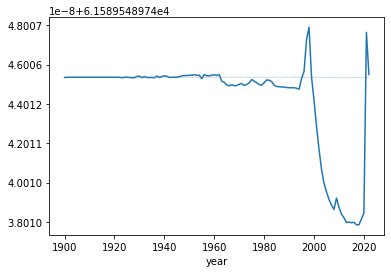

In [31]:
sns.lineplot(x=UsedVehicle['year'],y=UsedVehicle['price'].mean(), data =UsedVehicle)

In [32]:
#Task 3.11.0
UsedVehicle['type'].unique()

array(['pickup', 'truck', 'other', 'unknown', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [33]:
UsedVehicle_new02=UsedVehicle.groupby(['type','year'])['price'].mean()
UsedVehicle_new02

type   year  
SUV    1900.0    38250.000000
       1946.0     8000.000000
       1950.0    17500.000000
       1955.0     6250.500000
       1957.0     2500.000000
                     ...     
wagon  2018.0    21240.954113
       2019.0    23586.463221
       2020.0    22428.851266
       2021.0    23964.868421
       2022.0        0.000000
Name: price, Length: 1077, dtype: float64

In [34]:
#Task 3.11.1
a=len(UsedVehicle['type'].unique())
print(a)

14


There are 14 type of cars. i want to see what is average price
From below the least expesnive is mini-van. 1/4 of data is unknown ['type'] of vehicle

In [35]:
UsedVehicle_new02=UsedVehicle.groupby(['type'])['price'].mean()
UsedVehicle_new02

type
SUV             34787.758197
bus             14151.493069
convertible     20065.692399
coupe           22003.684947
hatchback       14454.374795
mini-van         9298.793567
offroad         15995.807496
other           24741.169535
pickup         149168.080729
sedan           16046.391414
truck           27490.611739
unknown        142381.842095
van             17286.600551
wagon           13362.944147
Name: price, dtype: float64

In [36]:
#Task 3.12.0
UsedVehicle['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'unknown',
       'brown', 'yellow', 'orange', 'green', 'custom', 'purple'],
      dtype=object)

In [37]:
#Task 3.12.1
a=len(UsedVehicle['paint_color'].unique())
print(a)

13


I want to know the break down of which the most popular color


In [38]:
UsedVehicle.groupby(['paint_color'])['size'].value_counts().unstack(0)

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,unknown,white,yellow
size,,,,,,,,,,,,,
compact,3326,2081,355,516,476,1999,149,57,1999,2843,1195,3236,221
full-size,10376,5549,1776,2204,1785,6261,272,179,5353,7403,3001,17636,468
mid-size,5732,3649,981,1153,1091,4322,208,98,3299,5347,1375,6579,260
sub-compact,567,369,60,68,101,258,36,6,371,413,275,503,70
unknown,41626,19047,3315,2696,3714,11102,1276,324,18893,26221,119319,49650,1059


In [39]:
#Task 3.13.0
#useless as description will be different, i would  think of dropping this column as long sentences of text
#cannot be converted into meaningful data


UsedVehicle['description'].unique()

array(["Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000909557📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7171237-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 

UsedVehicle['description'].nunique()

In [40]:
#Task 3.14.0
UsedVehicle['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [41]:
#Task 3.14.1
a=len(UsedVehicle['state'].unique())
print(a)

51


there is 51 states and there are only 50 states.  I figured out they used DC as a state.  I will also compare what stated vs type of cars sold

In [42]:
UsedVehicle.groupby(['size'])['state'].value_counts().unstack(0)

size,compact,full-size,mid-size,sub-compact,unknown
state,,,,,
ak,77.0,452.0,295.0,12.0,2587.0
al,139.0,779.0,392.0,24.0,3506.0
ar,98.0,478.0,258.0,7.0,3101.0
az,340.0,1147.0,706.0,61.0,6156.0
ca,2415.0,7076.0,3436.0,377.0,35429.0
co,563.0,1354.0,1160.0,67.0,7658.0
ct,275.0,746.0,455.0,76.0,3542.0
dc,227.0,385.0,231.0,39.0,2040.0
de,22.0,181.0,80.0,1.0,654.0


In [43]:
UsedVehicle.groupby(['type'])['state'].value_counts().unstack(0)

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,unknown,van,wagon
state,,,,,,,,,,,,,,
ak,946.0,1.0,29.0,77.0,73.0,66.0,13.0,104.0,387.0,758.0,457.0,323.0,47.0,142.0
al,844.0,26.0,79.0,194.0,172.0,33.0,5.0,245.0,607.0,942.0,333.0,1177.0,104.0,79.0
ar,465.0,4.0,87.0,134.0,198.0,27.0,6.0,198.0,532.0,481.0,232.0,1473.0,67.0,38.0
az,1269.0,5.0,171.0,407.0,414.0,86.0,35.0,755.0,1219.0,1698.0,448.0,1558.0,165.0,180.0
ca,8118.0,32.0,1041.0,2470.0,2536.0,415.0,120.0,2612.0,4581.0,12239.0,3093.0,9154.0,1063.0,1259.0
co,2447.0,16.0,112.0,366.0,413.0,75.0,25.0,536.0,1298.0,2030.0,728.0,2168.0,187.0,401.0
ct,749.0,1.0,116.0,213.0,299.0,56.0,8.0,616.0,550.0,1079.0,168.0,971.0,86.0,182.0
dc,494.0,3.0,71.0,167.0,153.0,47.0,2.0,231.0,227.0,894.0,76.0,323.0,94.0,140.0
de,129.0,1.0,21.0,45.0,23.0,12.0,1.0,23.0,75.0,213.0,84.0,277.0,8.0,26.0


In [44]:
#Task 3.15.0
UsedVehicle['posting_date'].unique()

array(['2021-05-04T12:31:18-0500', '2021-05-04T12:31:08-0500',
       '2021-05-04T12:31:25-0500', ..., '2021-04-04T03:21:17-0600',
       '2021-04-04T03:21:11-0600', '2021-04-04T03:21:07-0600'],
      dtype=object)

In [45]:
#Task 3.15.1
a=len(UsedVehicle['posting_date'].unique())
print(a)

372113


<AxesSubplot:>

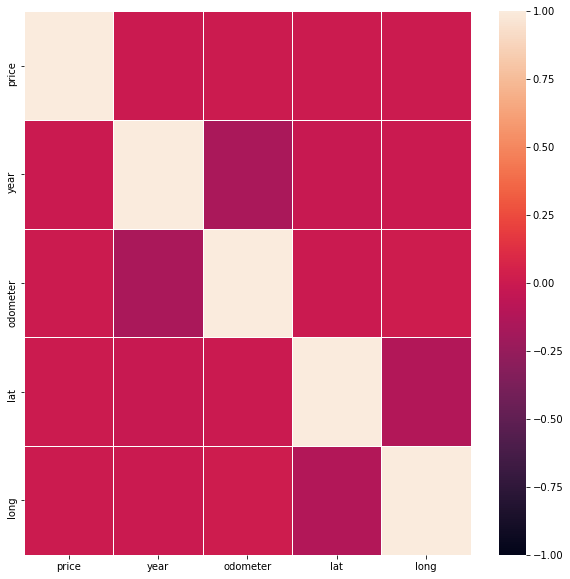

In [46]:
#Task 4.0
#test data to see correlation mapping
#Heat map with columns that are floats or int.  It will not work with str.
#adjust the scale so i can see anything that has correation greater than 0.  
#Previous chart with -1 to 1 was difficult to distinguest correlation

UsedVehicle_corr=UsedVehicle.corr()
fig,ax  =plt.subplots(figsize = (10,10))
sns.heatmap(UsedVehicle_corr, linewidth=.5,ax=ax, vmin=-1,vmax=1)

Looking at price / odometer and odometer / year

In [47]:
UsedVehicle[['odometer','year','price']].describe()

,odometer,year,price
count,4.161490e+05,416149.000000,4.161490e+05
mean,9.766435e+04,2011.365749,6.158955e+04
std,2.046903e+05,9.140825,1.108080e+07
min,0.000000e+00,1900.000000,0.000000e+00
25%,3.800000e+04,2008.000000,5.995000e+03
50%,8.568200e+04,2014.000000,1.399100e+04
75%,1.335030e+05,2017.000000,2.650000e+04
max,1.000000e+07,2022.000000,3.736929e+09


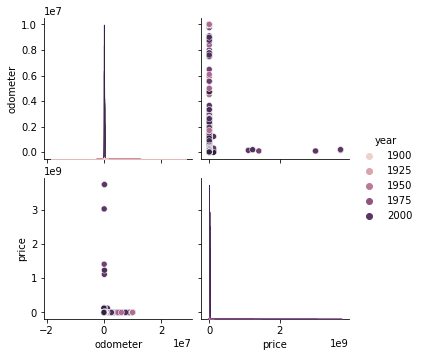

In [48]:
#Task 5.1
#seaborn pair plot
df1 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df1, hue='year')



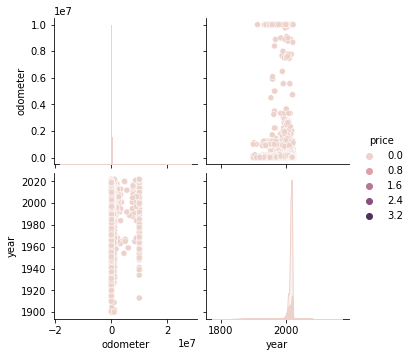

In [49]:
#Task 5.2


df2 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df2, hue='price')



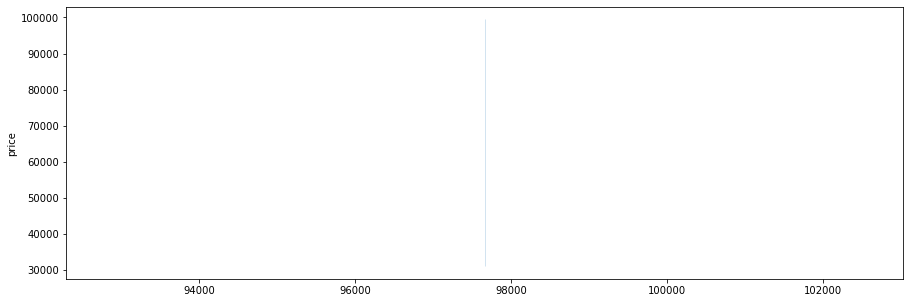

In [50]:
#Task 5.3.0
#box plot
plt.figure(figsize = (15,5))
sns.lineplot(x=UsedVehicle['odometer'].mean() ,y=UsedVehicle['price']);
plt.show()

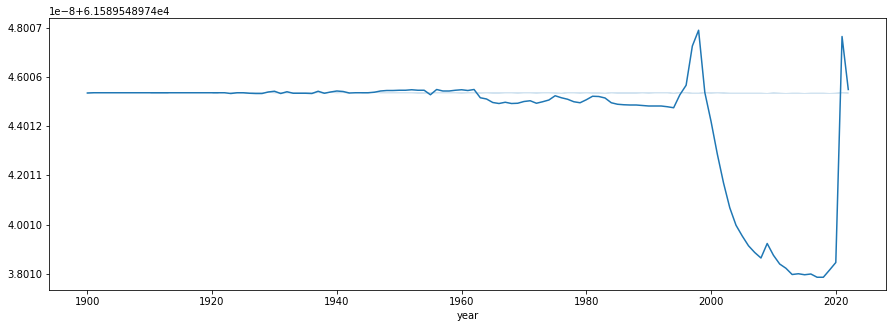

In [51]:
#Task 5.3.1
#box plot
plt.figure(figsize = (15,5))
sns.lineplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'].mean());
plt.show()

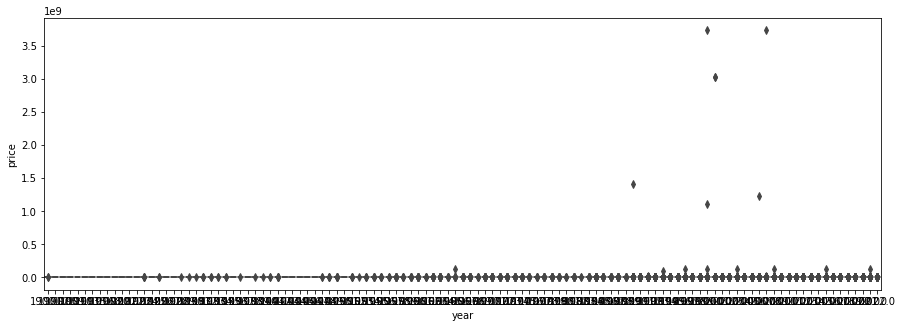

In [52]:
#Task 5.4
#box plot
plt.figure(figsize = (15,5))
sns.boxplot(x=UsedVehicle['year'] ,y=UsedVehicle['price']);
plt.show()

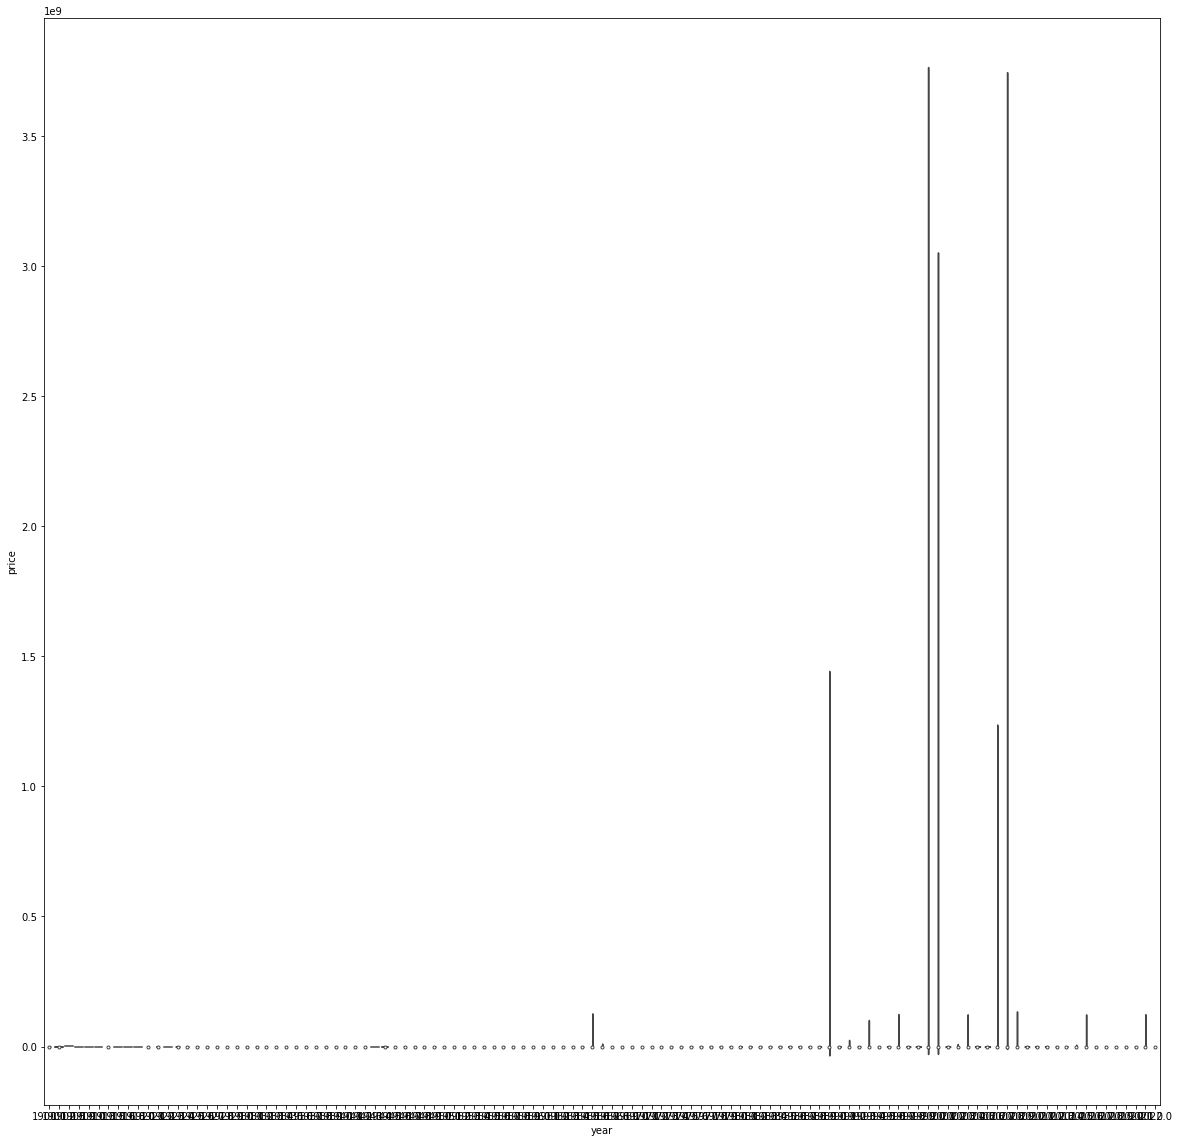

In [53]:
#Task 5.6

#Violin Plot

#aasize =(20,20)
fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'], ax =ax );
plt.show()

In [56]:
#Task 6.0
#group up category and graphy by price

UsedVehicle

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,description,state,lat,long,posting_date,posting_date2
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,unknown,unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:18-0500,2021-05-04
1,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,unknown,unknown,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:08-0500,2021-05-04
2,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:25-0500,2021-05-04
3,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,unknown,unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,2021-05-04
4,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,2021-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416144,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,...,fwd,unknown,sedan,unknown,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,2021-04-04
416145,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,unknown,gas,12029.0,clean,...,fwd,unknown,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,2021-04-04
416146,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,unknown,diesel,4174.0,clean,...,unknown,unknown,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,2021-04-04
416147,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,...,fwd,unknown,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,2021-04-04


In [57]:
#Task 6.1.0

UsedVehicle_new

size
compact         16883.896711
full-size       99610.141978
mid-size       121264.816361
sub-compact     12383.630933
unknown         50107.260701
Name: price, dtype: float64

In [58]:
#Task  6.1.1
#UsedVehicle_new=UsedVehicle.groupby('size')['price'].mean()
#size
#compact         16883.896711
#full-size       99610.141978
#mid-size       121264.816361
#sub-compact     12383.630933
#unknown         50107.260701
compVehicle = UsedVehicle[UsedVehicle['size']=='compact']
fullVehicle = UsedVehicle[UsedVehicle['size']=='full-size']
midVehicle = UsedVehicle[UsedVehicle['size']=='mid-size']
subVehicle = UsedVehicle[UsedVehicle['size']=='sub-compact']
unknVehicle = UsedVehicle[UsedVehicle['size']=='unknown']


In [59]:
#Task  6.1.2
dataComp=compVehicle.groupby('year')['price'].mean()
dataComp

year
1913.0    27000.000000
1916.0    30000.000000
1923.0    18335.833333
1926.0     6500.000000
1927.0    19999.166667
              ...     
2018.0    19262.085395
2019.0    19103.241667
2020.0    19596.813253
2021.0    23545.220339
2022.0        0.000000
Name: price, Length: 90, dtype: float64

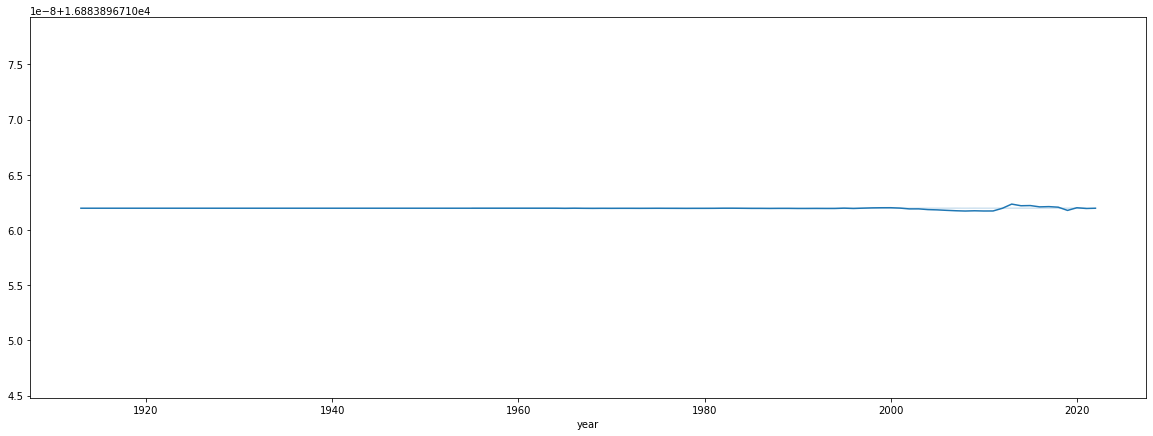

In [60]:
#Task  6.1.3
#box plot
plt.figure(figsize = (20,7))
sns.lineplot(x=compVehicle['year'] ,y=compVehicle['price'].mean());#blue line
plt.show()

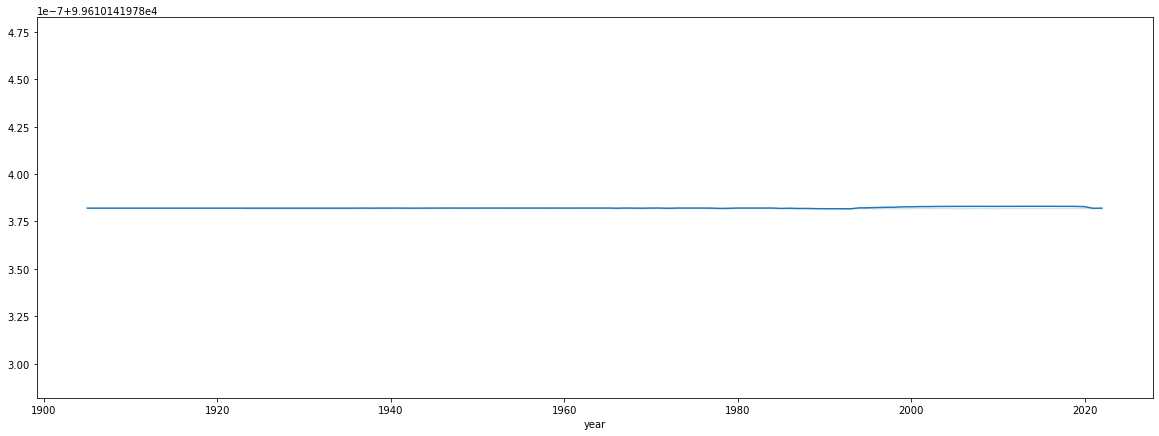

In [61]:
#Task  6.1.4
plt.figure(figsize = (20,7))
sns.lineplot(x=fullVehicle['year'] ,y=fullVehicle['price'].mean());
plt.show()

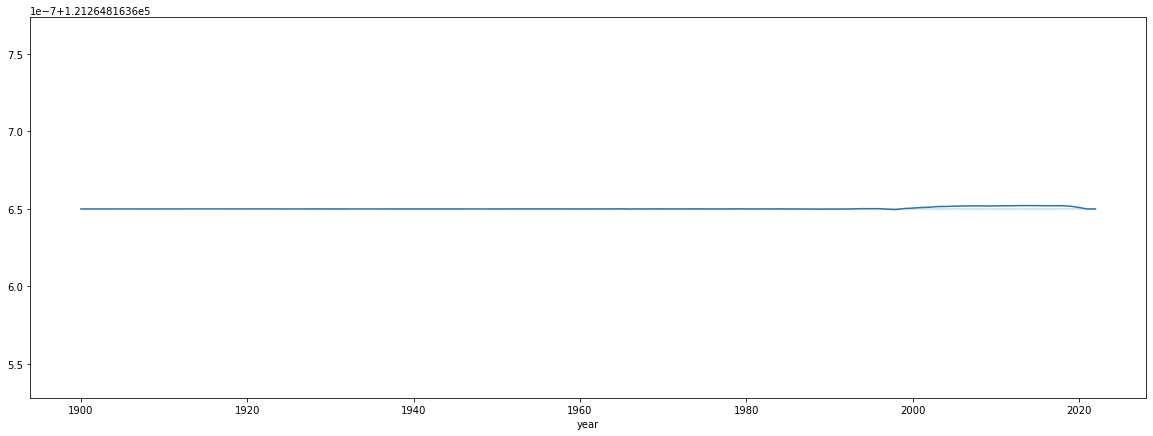

In [62]:
#Task  6.1.5
plt.figure(figsize = (20,7))
sns.lineplot(x=midVehicle['year'] ,y=midVehicle['price'].mean())
plt.show()


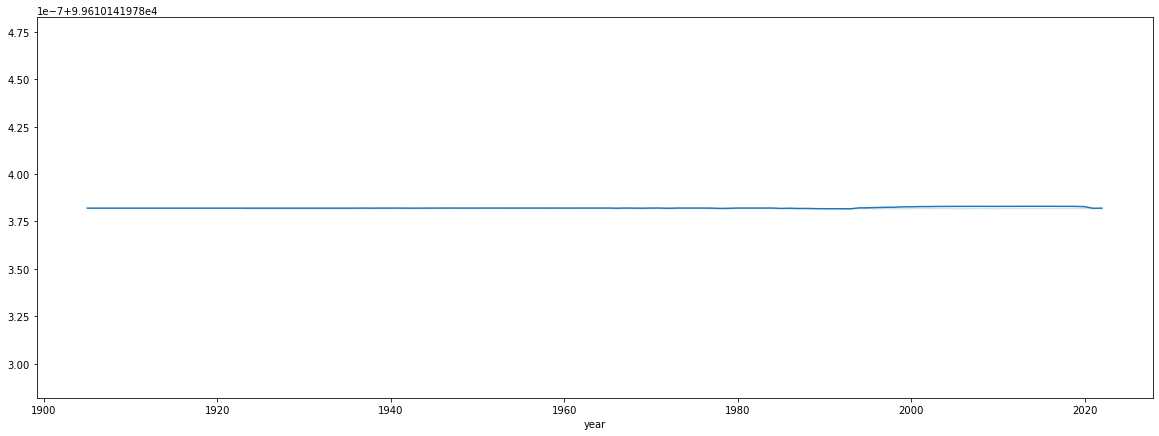

In [63]:
#Task  6.1.6
plt.figure(figsize = (20,7))
sns.lineplot(x=fullVehicle['year'] ,y=fullVehicle['price'].mean());
plt.show()

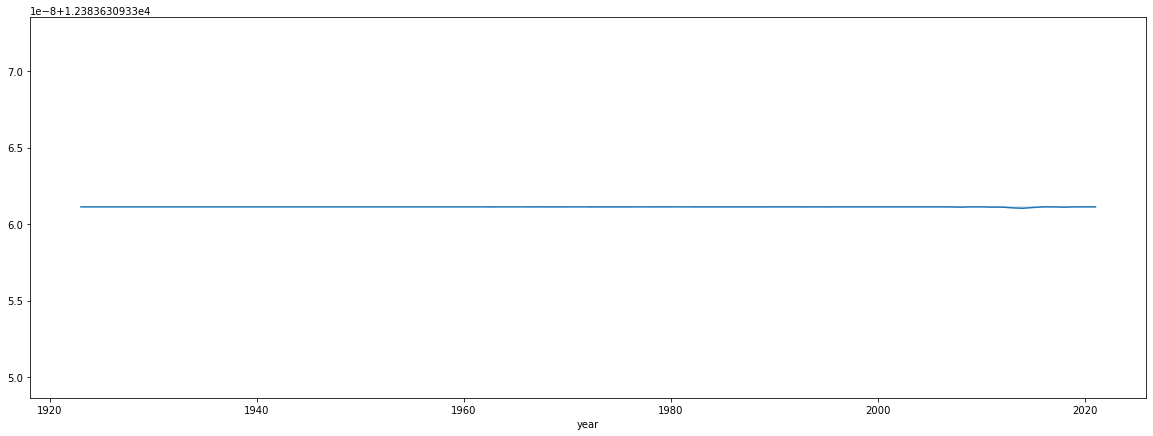

In [64]:
#Task  6.1.7
plt.figure(figsize = (20,7))
sns.lineplot(x=subVehicle['year'] ,y=subVehicle['price'].mean())
plt.show()


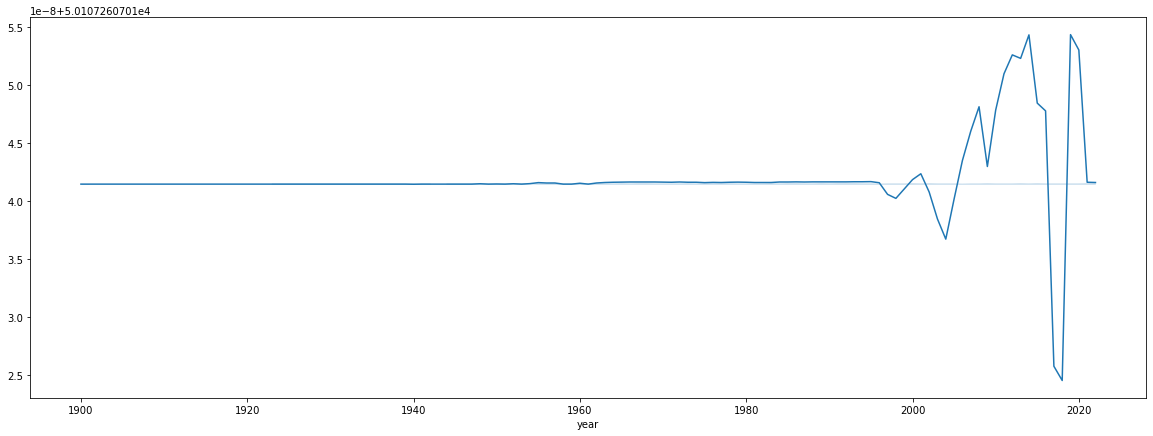

In [65]:
#Task 6.1.8
plt.figure(figsize = (20,7))
sns.lineplot(x=unknVehicle['year'] ,y=unknVehicle['price'].mean())
plt.show()


In [66]:
#Task 6.1.9
dataUnkn= unknVehicle.groupby('year')['price'].mean()
dataUnkn

year
1900.0    5.527273e+02
1901.0    5.495000e+02
1902.0    1.666666e+06
1910.0    1.500000e+04
1915.0    5.000000e+03
              ...     
2018.0    2.724033e+04
2019.0    3.107840e+04
2020.0    3.471916e+04
2021.0    9.283943e+04
2022.0    3.067314e+04
Name: price, Length: 108, dtype: float64

Filter by Type to compare price

There are the following type of vehicles but we will go for top 4-5 types
'pickup', 
'truck', 
'other', 
'unknown', 
'coupe', 
'SUV', 
'hatchback',
'mini-van',
'sedan', 
'offroad', 
'bus', 
'van', 
'convertible',
'wagon']

I will choose trucks, SUV, mini-van,sedan and pickup.  Below is count of each type

In [67]:
#Task  6.2.0
UsedVehicle.groupby('type')['type'].count()

type
SUV            75640
bus              505
convertible     7591
coupe          18854
hatchback      16481
mini-van        4757
offroad          587
other          20975
pickup         41943
sedan          85490
truck          34858
unknown        89484
van             8349
wagon          10635
Name: type, dtype: int64

In [68]:
#Task  6.2.1

UsedVehicle[['type','price']]

,type,price
0,pickup,33590
1,pickup,22590
2,pickup,39590
3,pickup,30990
4,truck,15000
...,...,...
416144,sedan,23590
416145,sedan,30590
416146,hatchback,34990
416147,sedan,28990


In [69]:
#Task  6.2.2
    
SUV = UsedVehicle[UsedVehicle['type']=='SUV']
MINI = UsedVehicle[UsedVehicle['type']=='mini-van']
PICKUP = UsedVehicle[UsedVehicle['type']=='pickup']
SEDAN = UsedVehicle[UsedVehicle['type']=='sedan']
TRUCK = UsedVehicle[UsedVehicle['type']=='truck']


In [70]:
#Task  6.2.3
#need to select a different type as there is 
#~ 8.4% is zero

a=  len (SUV[SUV['price']==0])
b = len(SUV['price'])
print('Price is zero: '+ str(a))
print ('Total SUV count: '+ str(b))
print(a/b)

Price is zero: 6336
Total SUV count: 75640
0.08376520359598097


In [71]:
 #Task  6.2.4
    
SUV[SUV['price']==0].count()

region           6336
price            6336
year             6336
manufacturer     6336
model            6336
condition        6336
cylinders        6336
fuel             6336
odometer         6336
title_status     6336
transmission     6336
VIN              6336
drive            6336
size             6336
type             6336
paint_color      6336
description      6336
state            6336
lat              6336
long             6336
posting_date     6336
posting_date2    6336
dtype: int64

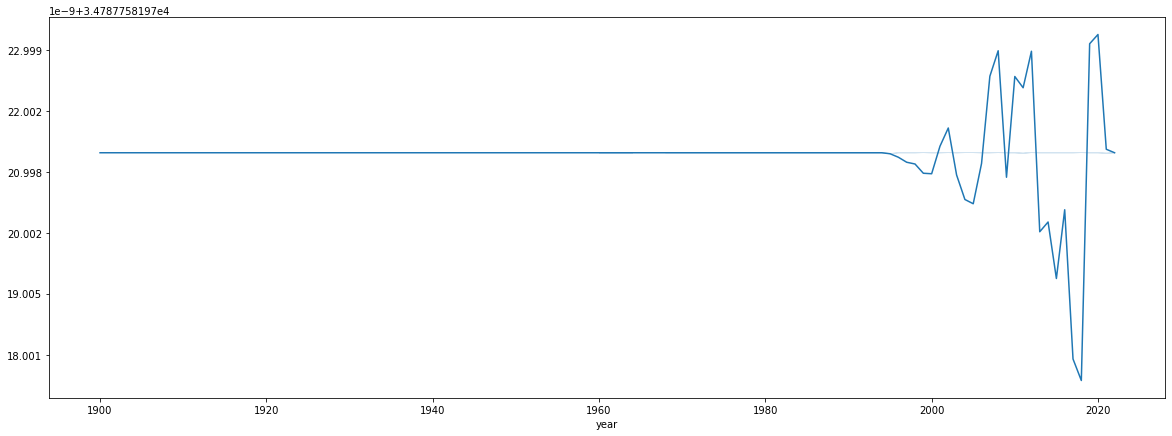

In [72]:
#Task  6.2.5
plt.figure(figsize = (20,7))
sns.lineplot(x=SUV['year'] ,y=SUV['price'].mean())
plt.show()


In [73]:
#Task  6.2.6
a=  len (MINI[MINI['price']==0])
b = len(MINI['price'])
print('Price is zero: '+ str(a))
print ('Total MINI count: '+ str(b))
print(a/b)

Price is zero: 246
Total MINI count: 4757
0.05171326466260248


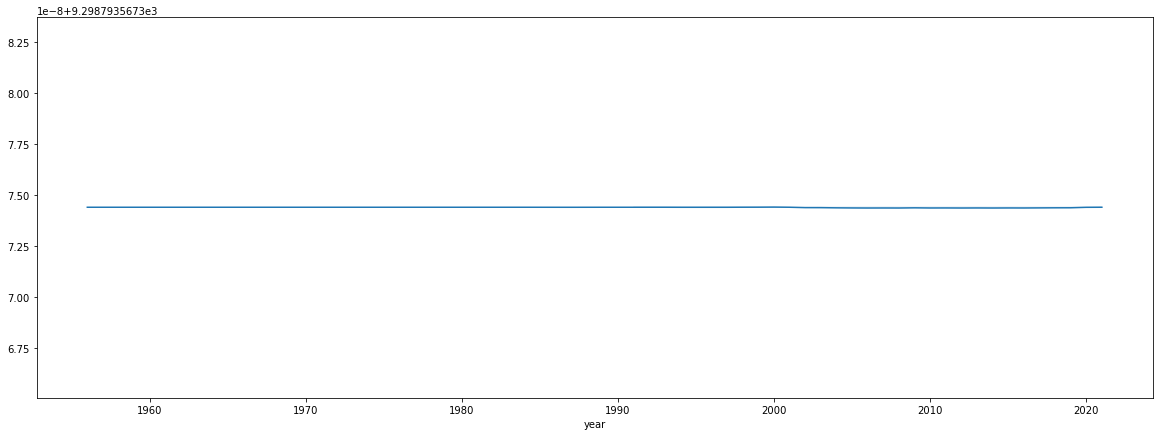

In [74]:
#Task  6.2.7
plt.figure(figsize = (20,7))
sns.lineplot(x=MINI['year'] ,y=MINI['price'].mean())
plt.show()


In [75]:
#Task  6.2.7
a=  len (PICKUP[PICKUP['price']==0])
b = len(PICKUP['price'])
print('Price is zero: '+ str(a))
print ('Total PICKUP count: '+ str(b))
print(a/b)

Price is zero: 1928
Total PICKUP count: 41943
0.04596714588846768


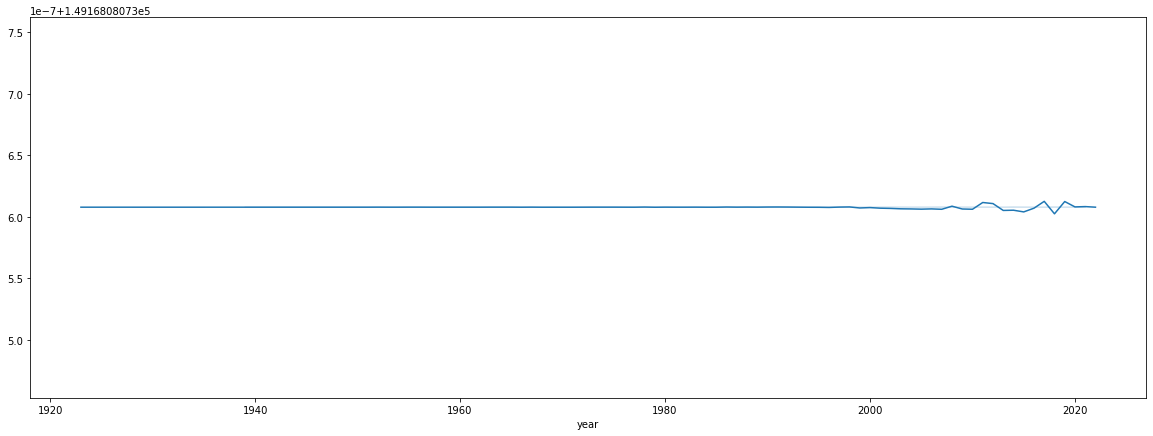

In [76]:
#Task  6.2.8
plt.figure(figsize = (20,7))
sns.lineplot(x=PICKUP['year'] ,y=PICKUP['price'].mean())
plt.show()

In [77]:
#Task  6.2.9
a=  len (SEDAN[SEDAN['price']==0])
b = len(SEDAN['price'])
print('Price is zero: '+ str(a))
print ('Total SEDAN count: '+ str(b))
print(a/b)

Price is zero: 6183
Total SEDAN count: 85490
0.07232424845011112


In [82]:
SEDAN.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,description,state,lat,long,posting_date,posting_date2
46,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,...,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al,32.8224,-85.7704,2021-04-24T18:39:59-0500,2021-04-24
48,auburn,18590,2018.0,honda,civic lx sedan 4d,good,unknown,gas,28942.0,clean,...,fwd,unknown,sedan,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-24T08:52:24-0500,2021-04-24
50,auburn,21590,2018.0,honda,civic ex sedan 4d,good,unknown,gas,7885.0,clean,...,fwd,unknown,sedan,unknown,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-24T08:52:03-0500,2021-04-24
60,auburn,22590,2016.0,volvo,s60 t5 cross country,good,unknown,gas,42755.0,clean,...,unknown,unknown,sedan,unknown,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-21T11:30:50-0500,2021-04-21
61,auburn,36990,2019.0,volvo,s60 t6 inscription sedan,good,unknown,gas,8141.0,clean,...,unknown,unknown,sedan,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-21T10:11:01-0500,2021-04-21
62,auburn,31990,2020.0,volvo,s60 t5 momentum sedan 4d,good,unknown,gas,16594.0,clean,...,fwd,unknown,sedan,unknown,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-21T09:30:56-0500,2021-04-21
63,auburn,28590,2019.0,volvo,s60 t5 momentum sedan 4d,good,unknown,gas,18531.0,clean,...,fwd,unknown,sedan,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-21T08:30:57-0500,2021-04-21
66,auburn,29590,2017.0,lincoln,continental select sedan,good,6 cylinders,gas,35320.0,clean,...,unknown,unknown,sedan,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-20T10:40:55-0500,2021-04-20
71,auburn,29590,2018.0,audi,a6 2.0t premium sedan 4d,good,unknown,gas,13035.0,clean,...,fwd,unknown,sedan,unknown,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-19T09:51:14-0500,2021-04-19
72,auburn,16590,2015.0,hyundai,sonata sport sedan 4d,good,unknown,gas,26655.0,clean,...,fwd,unknown,sedan,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-19T08:51:14-0500,2021-04-19


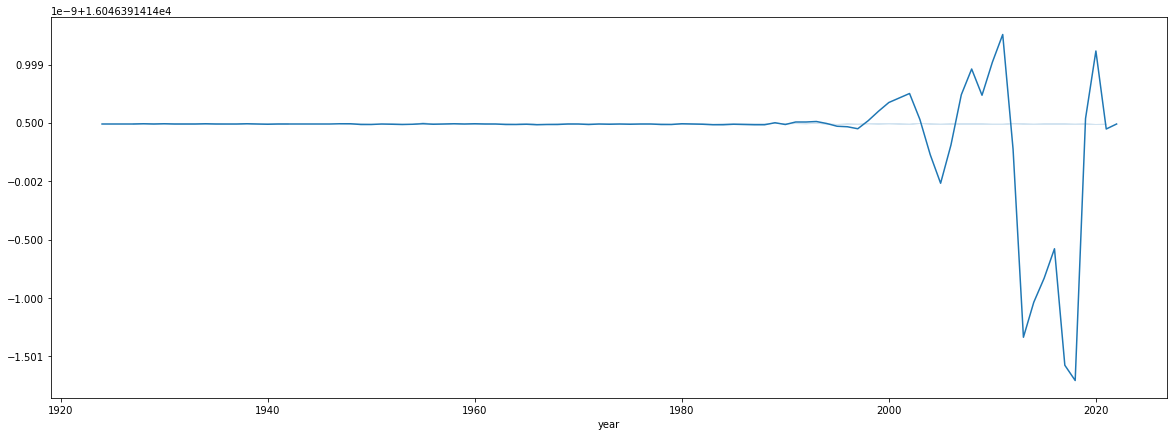

In [78]:
#Task  6.2.10
plt.figure(figsize = (20,7))
sns.lineplot(x=SEDAN['year'] ,y=SEDAN['price'].mean())
plt.show()

In [85]:
c=SEDAN.groupby('year')['price'].mean()


In [86]:
c

year
1924.0    22000.000000
1927.0    10333.333333
1928.0    29271.428571
1929.0    20816.666667
1930.0    23230.000000
              ...     
2018.0    21663.144502
2019.0    23616.775930
2020.0    28141.756171
2021.0    11198.186722
2022.0      100.000000
Name: price, Length: 94, dtype: float64

In [79]:
#Task  6.2.11
a=  len (TRUCK[TRUCK['price']==0])
b = len(TRUCK['price'])
print('Price is zero: '+ str(a))
print ('Total TRUCK count: '+ str(b))
print(a/b)

Price is zero: 4591
Total TRUCK count: 34858
0.13170577772677722


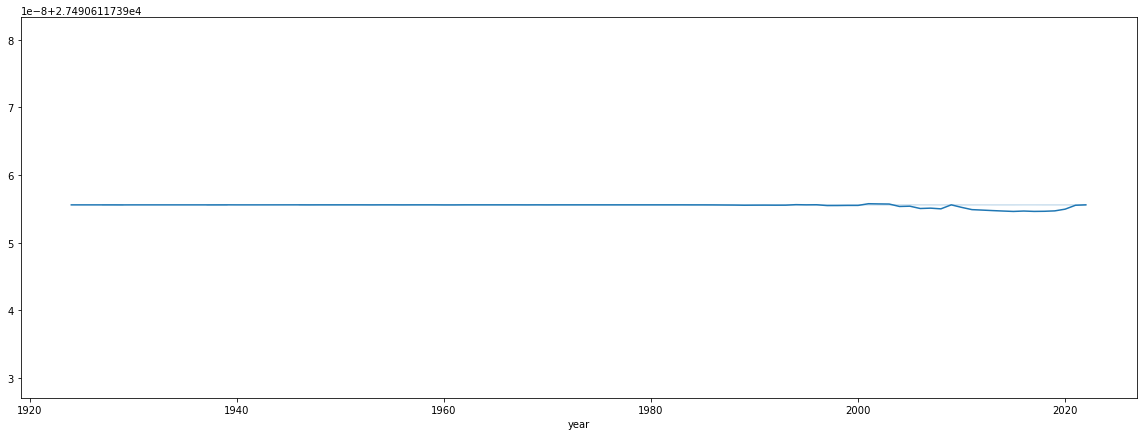

In [80]:
#Task  6.2.12
plt.figure(figsize = (20,7))
sns.lineplot(x=TRUCK['year'] ,y=TRUCK['price'].mean())
plt.show()

In [81]:
#Task 7.0.1
#Hypothesis testing

#How do i test, what do i test.

from scipy.stats import ttest_ind




In [ ]:
correlation matrix

Hypothesis Testing